In [2]:
import matplotlib.pyplot as plt


In [3]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

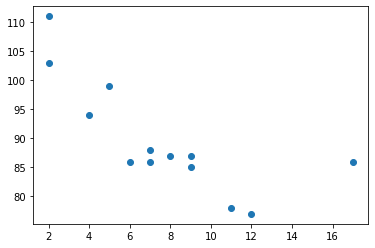

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from scipy import stats

In [6]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept

In [7]:
mymodel = list(map(myfunc, x))

In [8]:
mymodel

[94.3495217071376,
 90.84694628403238,
 89.09565857247976,
 90.84694628403238,
 99.60338484179543,
 73.33406916850626,
 99.60338484179543,
 87.34437086092716,
 96.10080941869022,
 83.84179543782193,
 82.09050772626932,
 87.34437086092716,
 92.59823399558499]

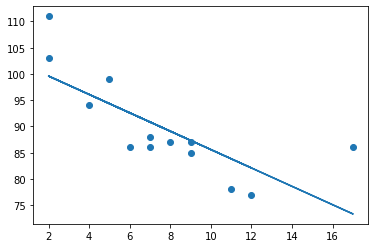

In [9]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [11]:
print(x)

[5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]


In [12]:
print(y)

[99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]


In [13]:
x = np.array(x)
x

array([ 5,  7,  8,  7,  2, 17,  2,  9,  4, 11, 12,  9,  6])

In [14]:
x = x.reshape(-1,1)
x

array([[ 5],
       [ 7],
       [ 8],
       [ 7],
       [ 2],
       [17],
       [ 2],
       [ 9],
       [ 4],
       [11],
       [12],
       [ 9],
       [ 6]])

In [15]:
y = np.array(y)
y


array([ 99,  86,  87,  88, 111,  86, 103,  87,  94,  78,  77,  85,  86])

In [16]:
y = y.reshape(-1,1)
y

array([[ 99],
       [ 86],
       [ 87],
       [ 88],
       [111],
       [ 86],
       [103],
       [ 87],
       [ 94],
       [ 78],
       [ 77],
       [ 85],
       [ 86]])

In [17]:
reg = LinearRegression().fit(x,y)

In [18]:
reg.score(x, y)

0.5754611008553381

In [19]:
reg.intercept_

array([103.10596026])

In [20]:
reg.predict(np.array([7]).reshape(-1,1))

array([[90.84694628]])

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [30]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [24]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [26]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [27]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


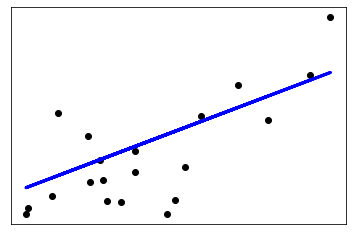

In [28]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()